<a href="https://colab.research.google.com/github/21PA1A6125/codealpha_tasks/blob/main/titanicSurvialPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Needed libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Loading The Data

In [47]:
df = pd.read_csv('/content/drive/MyDrive/codeAlpha/Titanic-Dataset.csv')

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploring The Data

In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
df.shape

(891, 12)

In [51]:
df.duplicated().sum()

0

In [52]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [53]:
df.drop('Cabin', axis=1,inplace=True)

In [54]:
df.dropna(inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


# Analysis & Visualization

In [56]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [57]:
gender = df['Sex'].value_counts()
gender

Sex
male      453
female    259
Name: count, dtype: int64

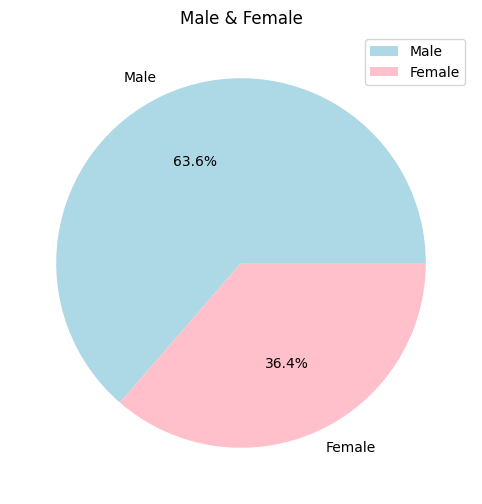

In [58]:
plt.figure(figsize=(10,6))
plt.pie(gender, labels=['Male', 'Female'] ,autopct='%.1f%%', colors=['lightblue','pink'])
plt.legend()
plt.title('Male & Female')
plt.show()

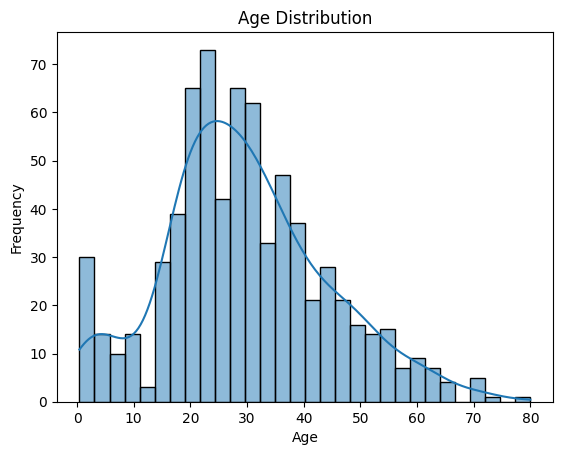

In [59]:
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [60]:
sv_sex = df[['Survived','Sex']].value_counts().reset_index()
sv_sex

,Survived,Sex,count
0,0,male,360
1,1,female,195
2,1,male,93
3,0,female,64


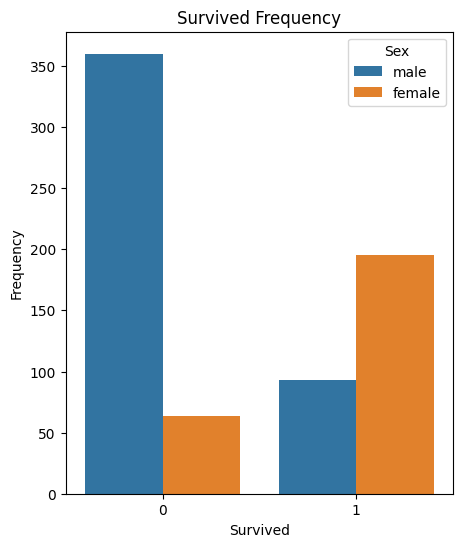

In [61]:
plt.figure(figsize=(5,6))
sns.barplot(data=sv_sex , x=sv_sex['Survived'], y=sv_sex['count'], hue=sv_sex['Sex'])
plt.title('Survived Frequency')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

In [62]:
sv_class = df[['Survived', 'Pclass']].value_counts().reset_index()
sv_class

,Survived,Pclass,count
0,0,3,270
1,1,1,120
2,0,2,90
3,1,3,85
4,1,2,83
5,0,1,64


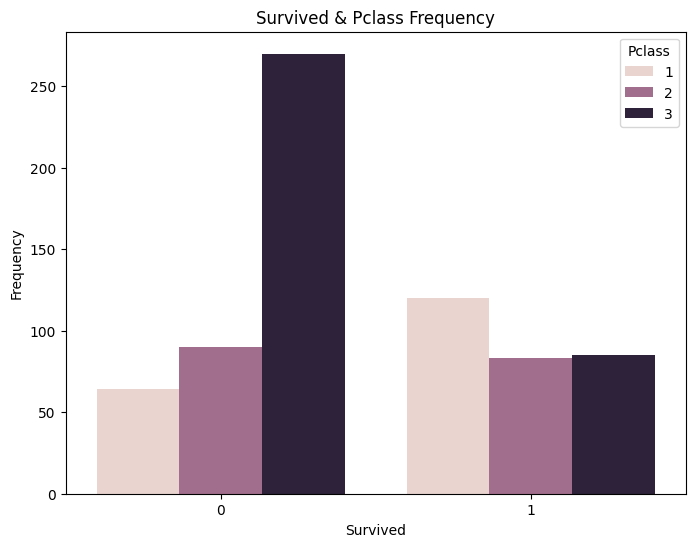

In [63]:
plt.figure(figsize=(8,6))
sns.barplot(data=sv_class , x=sv_class['Survived'], y=sv_class['count'], hue=sv_class['Pclass'])
plt.title('Survived & Pclass Frequency')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

In [64]:
sv_sibling = df[['Survived', 'SibSp']].value_counts().reset_index()
sv_sibling

,Survived,SibSp,count
0,0,0,296
1,1,0,173
2,1,1,97
3,0,1,86
4,0,4,15
5,0,2,14
6,1,2,11
7,0,3,8
8,0,5,5
9,1,3,4


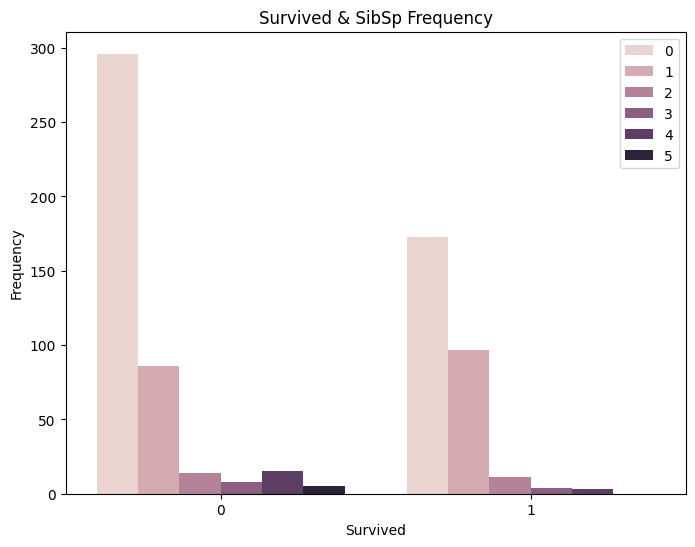

In [65]:
plt.figure(figsize=(8,6))
sns.barplot(data=sv_sibling , x=sv_sibling['Survived'], y=sv_sibling['count'], hue=sv_sibling['SibSp'])
plt.title('Survived & SibSp Frequency')
plt.legend(loc='upper right')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

# Bulid The Model

In [66]:
test = df.drop(['PassengerId','Name','Ticket'], axis=1)
test

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [67]:
label_encoder = LabelEncoder()

In [68]:
test['Sex'] = label_encoder.fit_transform(test['Sex'])
test['Embarked'] = label_encoder.fit_transform(test['Embarked'])

In [69]:
test

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,1
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
889,1,1,1,26.0,0,0,30.0000,0


In [70]:
x= test.drop('Survived', axis=1)
y = test['Survived']

In [71]:
X_train, x_test, Y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=11)

### Logistic Regression

In [72]:
model_logistic = LogisticRegression()

In [73]:
model_logistic.fit(X_train,Y_train)

LogisticRegression()

In [74]:
model_logistic.score(X_train,Y_train)

0.8154657293497364

In [75]:
model_logistic.score(x_test,y_test)

0.7482517482517482

### Random Forest

In [76]:
model_random = RandomForestClassifier()

In [77]:
model_random.fit(X_train,Y_train)

RandomForestClassifier()

In [78]:
model_random.score(X_train,Y_train)

0.984182776801406

In [79]:
model_random.score(x_test,y_test)

0.8251748251748252